In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, nsolve

In [2]:
from matplotlib.colors import LogNorm
from matplotlib import rcParams

In [4]:
from wrapper import solve_numeric
from wrapper import EQ1, EQ2, EQ3, EQ4

Define symbols for two codon model

In [3]:
Tt1, Tt2, Tc1, Tc2, Rb1, Rb2, fopt = symbols('Tt1 Tt2 Tc1 Tc2 Rb1 Rb2 fopt')
Rt, Rb, Tt, Tc, N, L, Ksp, Kbd, Kch = symbols('Rt Rb Tt Tc N L Ksp Kbd Kch')

In [5]:
def rbs_conversion(rbs):
    AVOGADRO = 6.02214076e23
    VOLUME = 8e-16
    return round(rbs / (AVOGADRO * VOLUME), 10)

In [6]:
rbs_conversion(30)

6.23e-08

This notebook computes the derivatives of Tc1, Tc2, Rb1, and Rb2 (with respect to fop) numerically in a system with a 70:30 tRNA ratio

In [7]:
#RBS_STRENGTH = rbs_conversion(30000000)
params = {N: 100,
       Kbd: 0.005,
#       Kch: 10,
       Rt: 500,
       Tt1: 1750,
       Tt2: 750,
       Ksp: 0.05,
       L: 300}

vals = [3, 10, 30, 100, 300]
df_07 = solve_numeric(params, Kch, vals, name="kch") 

{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.05, L: 300, Kch: 3}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.05, L: 300, Kch: 10}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.05, L: 300, Kch: 30}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.05, L: 300, Kch: 100}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.05, L: 300, Kch: 300}


In [8]:
norm = LogNorm(vmin=vals[0], vmax=vals[-1]) 

In [9]:
df_07["trna_prop"] = 0.7

In [10]:
df_07["protein_expr_rate"] = df_07["protein"] / 100

In [11]:
df_07["Rf"] = 500 - df_07["Rb"]

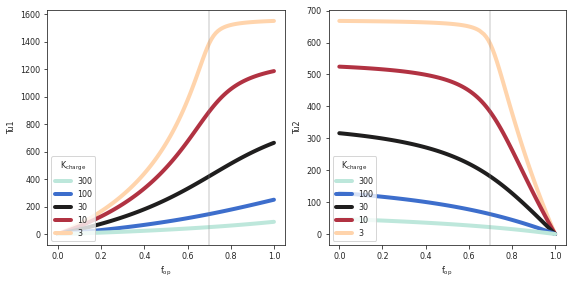

In [14]:
fig, ax = plt.subplots(1, 2) #figsize=(24, 6)

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams["text.usetex"] = False
#plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

palette = sns.color_palette("icefire_r", as_cmap=True)

g1 = sns.lineplot(data=df_07, 
                 x="fopt", 
                 y="tu1", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette,
                 linewidth=4,
                 ax=ax[0])
g1.set_xlabel(r"$f_{op}$")
#g1.set_ylim(0, 110)
#g1.set_ylabel("protein mols. per second")
g1.set_ylabel("Tu1")
g1.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)
g1.axvline(0.7, alpha=0.3, color="grey")

g2 = sns.lineplot(data=df_07, 
                 x="fopt", 
                 y="tu2", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette,
                 linewidth=4,
                 ax=ax[1])
g2.set_xlabel(r"$f_{op}$")
#g2.set_ylim(0, 110)
#g2.set_ylabel("protein mols. per second")
g2.set_ylabel("Tu2")
#g2.set_ylabel("")
g2.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)
g2.axvline(0.7, alpha=0.3, color="grey")

plt.tight_layout()
#plt.savefig("fig/kch_3_300_midpoint_trna_07_09_numeric.png")

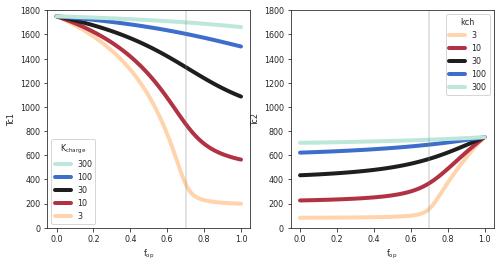

In [15]:
fig, ax = plt.subplots(1, 2) #figsize=(24, 6)
rate = 100
#df_07_ = df_07[(df_07.kch == rate)]

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams["text.usetex"] = False
#plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

palette = sns.color_palette("icefire_r", as_cmap=True)

g1 = sns.lineplot(data=df_07, 
                 x="fopt", 
                 y="tc1", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette,
                 linewidth=4,
                  ax=ax[0]
                )

g2 = sns.lineplot(data=df_07, 
                 x="fopt", 
                 y="tc2", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette,
                 linewidth=4,
                  ax=ax[1]
                )

g1.set_xlabel(r"$f_{op}$")
g2.set_xlabel(r"$f_{op}$")
g1.set_ylim(0, 1800)
g2.set_ylim(0, 1800)
g1.set_ylabel("Tc1")
g2.set_ylabel("Tc2")
g1.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)
g1.axvline(0.7, alpha=0.3, color="grey")
g2.axvline(0.7, alpha=0.3, color="grey")

### Plot deltas

In [16]:
df_07['tc1_diff'] = df_07['tc1'].diff()
df_07['tc2_diff'] = df_07['tc2'].diff()
df_07['rb1_diff'] = df_07['rb1'].diff()
df_07['rb2_diff'] = df_07['rb2'].diff()

df_07['fop_diff'] = df_07['fopt'].diff()
df_07 = df_07[(df_07.fopt > 0)]

df_07['Tc1'] = df_07['tc1_diff'] / df_07['fop_diff'] * -1
df_07['Tc2'] = df_07['tc2_diff'] / df_07['fop_diff']
df_07['Rb1'] = df_07['rb1_diff'] / df_07['fop_diff']
df_07['Rb2'] = df_07['rb2_diff'] / df_07['fop_diff'] * -1
df_07['Rb2_alt'] = df_07['rb2_diff'] / df_07['fop_diff']

In [17]:
df_07_long = pd.melt(df_07, id_vars=['fopt', 'kch'], 
                    value_vars=['Tc1', 'Tc2', 'Rb1', 'Rb2', 'Rb2_alt'],
                    var_name='species', 
                    value_name='delta')

In [18]:
from matplotlib.colors import to_hex
cmap_codes = sns.color_palette("icefire_r", as_cmap=True).colors
cmap_hex = [to_hex(c) for c in cmap_codes]
colors = [cmap_hex[0], cmap_hex[round(len(cmap_hex)/4)], cmap_hex[round(len(cmap_hex)/2)], cmap_hex[round(len(cmap_hex)/4)*3]]

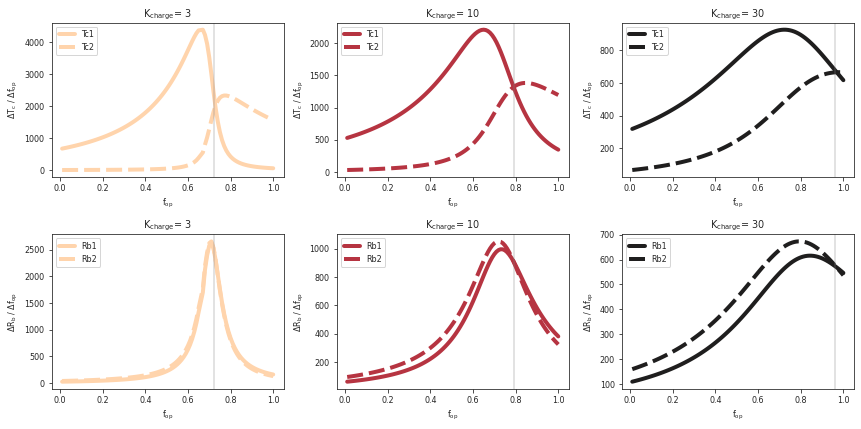

In [20]:
fig, ax = plt.subplots(2, 3) 

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams["text.usetex"] = False
#plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

df_delta_tc = df_07_long[df_07_long["species"].isin(['Tc1', 'Tc2'])]

for idx, params in enumerate([{"val": 3, "fop": 0.72}, {"val": 10, "fop": 0.79}, {"val": 30, "fop": 0.96}]):
    f = df_delta_tc[(df_delta_tc.kch == params["val"])]
    g1 = sns.lineplot(data=f, 
                     x="fopt", 
                     y="delta", 
                     style="species",
                     color=colors[idx],
                     linewidth=4,
                     ax=ax[0][idx]
                    )
    g1.set_xlabel(r"$f_{op}$")
    g1.set_ylabel(r"$\Delta T_{c}$"+" / "+r"$\Delta f_{op}$")
    g1.axvline(params["fop"], alpha=0.3, color="grey")
    g1.legend(loc="upper left")
    g1.set_title(r"$K_{charge}$"+f"= {params['val']}")


df_delta_rb = df_07_long[df_07_long["species"].isin(['Rb1', 'Rb2'])]

for idx, params in enumerate([{"val": 3, "fop": 0.72}, {"val": 10, "fop": 0.79}, {"val": 30, "fop": 0.96}]):
    f = df_delta_rb[(df_delta_rb.kch == params["val"])]
    g1 = sns.lineplot(data=f, 
                     x="fopt", 
                     y="delta", 
                     style="species",
                     color=colors[idx],
                     linewidth=4,
                     ax=ax[1][idx]
                    )
    g1.set_xlabel(r"$f_{op}$")
    g1.set_ylabel(r"$\Delta R_{b}$"+" / "+r"$\Delta f_{op}$")
    g1.axvline(params["fop"], alpha=0.3, color="grey")
    g1.legend(loc="upper left")
    g1.set_title(r"$K_{charge}$"+f"= {params['val']}")


plt.tight_layout()
#g1.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)
#g1.axvline(0.72, alpha=0.3, color="grey")
#plt.savefig("fig/tc_and_rb_deltas.png")

In [21]:
df_delta_tc.to_csv("df_07_tc_deltas.csv")

In [22]:
df_07_ = df_07[(df_07.fopt > 0) & (df_07.fopt < 1)]

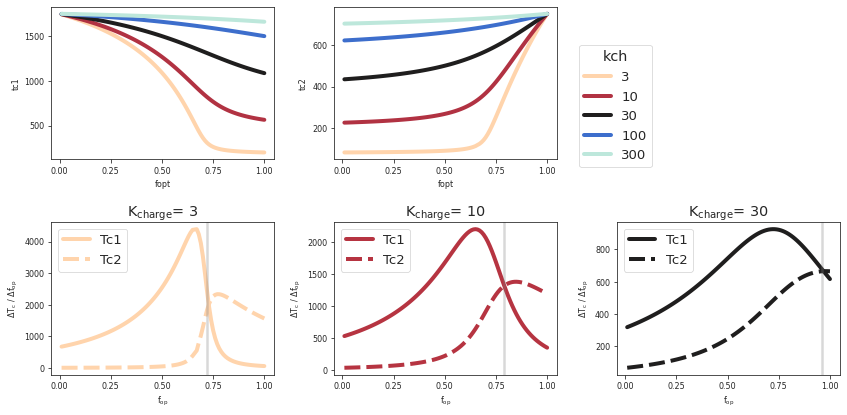

In [23]:
fig, ax = plt.subplots(2, 3) 

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams["text.usetex"] = False
#plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

g = sns.lineplot(data=df_07, 
                     x="fopt", 
                     y="tc1", 
                     hue="kch",
                     hue_norm=norm,
                     linewidth=4,
                     palette=palette,
                     ax=ax[0][0]
                    )

#legend = ax[0][0].legend()

g = sns.lineplot(data=df_07, 
                     x="fopt", 
                     y="tc2", 
                     hue="kch",
                     hue_norm=norm,
                     linewidth=4,
                     palette=palette,
                     ax=ax[0][1]
                    )

ax[0][2].legend(*ax[0][0].get_legend_handles_labels(), loc='center left', bbox_to_anchor=(-0.2, 0.35), title="kch")
ax[0][2].axis('off')
ax[0][0].get_legend().remove()
ax[0][1].get_legend().remove()


df_delta_tc = df_07_long[df_07_long["species"].isin(['Tc1', 'Tc2'])]

for idx, params in enumerate([{"val": 3, "fop": 0.72}, {"val": 10, "fop": 0.79}, {"val": 30, "fop": 0.96}]):
    f = df_delta_tc[(df_delta_tc.kch == params["val"])]
    g1 = sns.lineplot(data=f, 
                     x="fopt", 
                     y="delta", 
                     style="species",
                     color=colors[idx],
                     linewidth=4,
                     ax=ax[1][idx]
                    )
    g1.set_xlabel(r"$f_{op}$")
    g1.set_ylabel(r"$\Delta T_{c}$"+" / "+r"$\Delta f_{op}$")
    if params["fop"]:
        g1.axvline(params["fop"], alpha=0.3, color="grey")
    g1.legend(loc="upper left")
    g1.set_title(r"$K_{charge}$"+f"= {params['val']}")

plt.tight_layout()